In [1]:
from yahpo_gym.configuration import config_dict, cfg
from yahpo_gym.benchmark_set import BenchmarkSet
from yahpo_gym import local_config
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bench = BenchmarkSet("iaml_glmnet", active_session=False, check=False)
bench.config.config["model"] = "model_v2.onnx"
bench.active_session
bench.set_session()

In [3]:
df = pd.read_csv(bench.config.get_path("test_dataset"))

In [4]:
def plot_true_lc(ccs, target):
    colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF",
              "#00FFFF", "#FFA500", "#800080", "#008000", "#000080",
              "#800000", "#008080", "#808000", "#808080", "#C0C0C0",
              "#FFC0CB", "#FF4500", "#00CED1", "#FF1493", "#9400D3"]
    # Subset data to obtain learning curve for config
    for i, cc in enumerate(ccs):
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        config = pd.DataFrame(data = x, index = [0])
        config.drop(bench.config.fidelity_params, axis = 1, inplace=True)
        pdf = df.merge(config, on=list(config.columns.values))
        pdf = pdf.sort_values(bench.config.fidelity_params[0])
        plt.plot(pdf[bench.config.fidelity_params[0]], pdf[target],
                 color = colors[i], marker = "o", linestyle="None", alpha=0.5)

In [5]:
def plot_lc(ccs, target, fidelity_sequence):
    colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF",
              "#00FFFF", "#FFA500", "#800080", "#008000", "#000080",
              "#800000", "#008080", "#808000", "#808080", "#C0C0C0",
              "#FFC0CB", "#FF4500", "#00CED1", "#FF1493", "#9400D3"]
    for i, cc in enumerate(ccs):
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        x[bench.config.instance_names] = str(x[bench.config.instance_names])
        if bench.config.config_id == "iaml_ranger":
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]

        res = bench.objective_function(out)
        res = [x[target] for x in res]
        plt.plot(fidelity_sequence, res, color = colors[i])

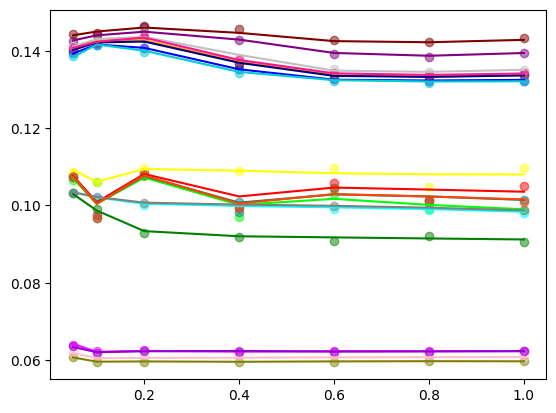

In [6]:
# Draw a sample configuration
ccs = [df.sample(1).to_dict() for i in range(20)]
target = "rammodel"
#target = "val_balanced_accuracy"
fidelity_sequence = [0.05, 0.10, 0.2, 0.4, 0.6, 0.8, 1.00]
#fidelity_sequence = range(1, 51)
plot_true_lc(ccs, target=target)
plot_lc(ccs, target=target, fidelity_sequence=fidelity_sequence)

In [7]:
ccs

[{'task_id': {4907: 1067},
  'alpha': {4907: 0.40518278},
  's': {4907: 0.0054972703},
  'trainsize': {4907: 0.4},
  'mmce': {4907: 0.14225551},
  'f1': {4907: 0.92048484},
  'auc': {4907: 0.7887488},
  'logloss': {4907: 0.35614845},
  'rammodel': {4907: 0.09936},
  'timetrain': {4907: 0.239},
  'mec': {4907: 1.0},
  'ias': {4907: 0.056648683},
  'nf': {4907: 13.0}},
 {'task_id': {2813: 1067},
  'alpha': {2813: 0.6537315},
  's': {2813: 0.0014000488},
  'trainsize': {2813: 1.0},
  'mmce': {2813: 0.14033051},
  'f1': {2813: 0.9216116},
  'auc': {2813: 0.7990002},
  'logloss': {2813: 0.3503236},
  'rammodel': {2813: 0.098768},
  'timetrain': {2813: 0.454},
  'mec': {2813: 1.0},
  'ias': {2813: 0.035650615},
  'nf': {2813: 16.0}},
 {'task_id': {616: 40981},
  'alpha': {616: 0.61228275},
  's': {616: 92.951385},
  'trainsize': {616: 0.1},
  'mmce': {616: 0.44492754},
  'f1': {616: 0.7136905},
  'auc': {616: 0.5},
  'logloss': {616: 0.69856995},
  'rammodel': {616: 0.141584},
  'timetrain':

In [33]:
bench = BenchmarkSet("iaml_glmnet", active_session=False, check=False, noisy=False)
bench.config.config["model"] = "model_v2.onnx"
print(bench.active_session)
bench.set_session()
print(bench._get_model_path())

target = "auc"

False
/home/lps/Phd/yahpo_data/iaml_glmnet/model_v2.onnx


In [34]:
def plot_lc_noisy(cc, target, fidelity_sequence):
    colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF",
              "#00FFFF", "#FFA500", "#800080", "#008000", "#000080",
              "#800000", "#008080", "#808000", "#808080", "#C0C0C0",
              "#FFC0CB", "#FF4500", "#00CED1", "#FF1493", "#9400D3"]
   
    for i in range(len(colors)):
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        x[bench.config.instance_names] = str(x[bench.config.instance_names])
        if bench.config.config_id == "iaml_ranger":
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]

        res = bench.objective_function(out, seed=i)
        res = [x[target] for x in res]
        plt.plot(fidelity_sequence, res, color = colors[i])

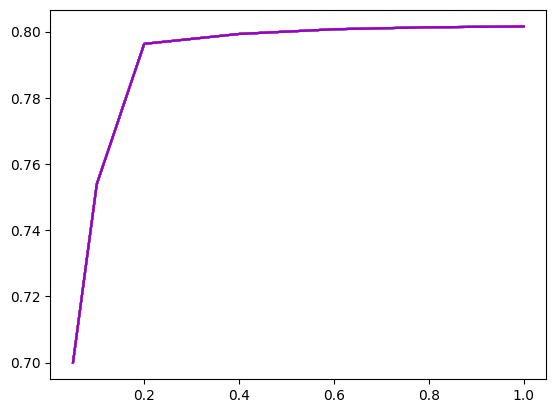

In [35]:
plot_lc_noisy(ccs[1], target, fidelity_sequence)

In [36]:
bench = BenchmarkSet("iaml_glmnet", active_session=False, check=False, noisy=True)
bench._get_model_path()

'/home/lps/Phd/yahpo_data/iaml_glmnet/model_v2_noisy.onnx'

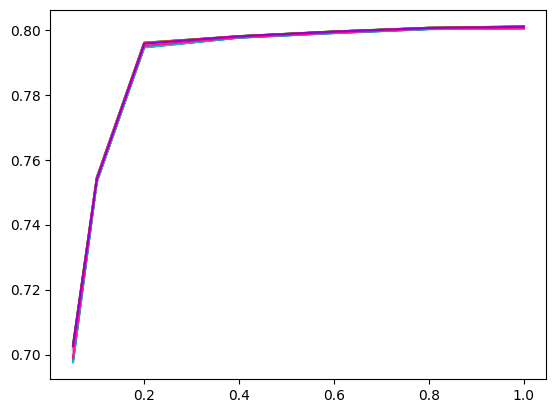

In [37]:
plot_lc_noisy(ccs[1], target, fidelity_sequence)